In [278]:
#import Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

In [279]:
#Import Data
df = pd.read_csv("NCVS_Select_-_Personal_Victimization.csv")

## Basic Data Review

In [280]:
#Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63465 entries, 0 to 63464
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idper           63465 non-null  object 
 1   yearq           63465 non-null  float64
 2   year            63465 non-null  int64  
 3   ager            63465 non-null  int64  
 4   sex             63465 non-null  int64  
 5   hispanic        63465 non-null  int64  
 6   race            63465 non-null  int64  
 7   race_ethnicity  63465 non-null  int64  
 8   hincome1        63465 non-null  int64  
 9   hincome2        63465 non-null  int64  
 10  marital         63465 non-null  int64  
 11  popsize         63465 non-null  int64  
 12  region          63465 non-null  int64  
 13  msa             63465 non-null  int64  
 14  locality        63465 non-null  int64  
 15  educatn1        63465 non-null  int64  
 16  educatn2        63465 non-null  int64  
 17  veteran         63465 non-null 

In [281]:

df['year']

0        2004
1        2009
2        2004
3        2011
4        2004
         ... 
63460    2021
63461    2021
63462    2021
63463    2021
63464    2021
Name: year, Length: 63465, dtype: int64

In [282]:
df.columns

Index(['idper', 'yearq', 'year', 'ager', 'sex', 'hispanic', 'race',
       'race_ethnicity', 'hincome1', 'hincome2', 'marital', 'popsize',
       'region', 'msa', 'locality', 'educatn1', 'educatn2', 'veteran',
       'citizen', 'newcrime', 'newoff', 'seriousviolent', 'notify',
       'vicservices', 'locationr', 'direl', 'weapon', 'weapcat', 'injury',
       'serious', 'treatment', 'offenderage', 'offendersex', 'offtracenew',
       'wgtviccy', 'series', 'newwgt'],
      dtype='object')

## Data Cleaning

In [283]:
df = df[['yearq','year']]
df.columns

Index(['yearq', 'year'], dtype='object')

In [284]:
df.isnull().sum()

yearq    0
year     0
dtype: int64

In [285]:
df.describe()

,yearq,year
count,63465.000000,63465.000000
mean,2004.862075,2004.611849
std,9.070978,9.071131
min,1993.100000,1993.000000
25%,1996.400000,1996.000000
50%,2003.100000,2003.000000
75%,2013.200000,2013.000000
max,2021.400000,2021.000000


## Data Preprocessing

In [286]:
#Assigning Quarters from the yearq column
quarters = []
for year in df['yearq']:
    try:
        quarter = str(year).split('.')[1]
    except IndexError:
        quarter = 'Invalid'
    quarters.append(quarter)

df['quarter'] = quarters
df['quarter'] = df['quarter'].astype(int)

In [287]:
time_df = pd.DataFrame()
time_df['YearQ'] = pd.PeriodIndex(year=df['year'].astype(int), quarter=df['quarter'])
time_df['YearQ'] = time_df['YearQ'].dt.to_timestamp()
time_df = time_df['YearQ'].value_counts().reset_index().sort_values(by=['YearQ']).reset_index(drop=True)
time_df.set_index(['YearQ'])

,count
YearQ,
1993-01-01,589
1993-04-01,536
1993-07-01,1239
1993-10-01,1366
1994-01-01,1297
...,...
2020-10-01,457
2021-01-01,450
2021-04-01,412


In [288]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YearQ   116 non-null    datetime64[ns]
 1   count   116 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


## Data Visualization

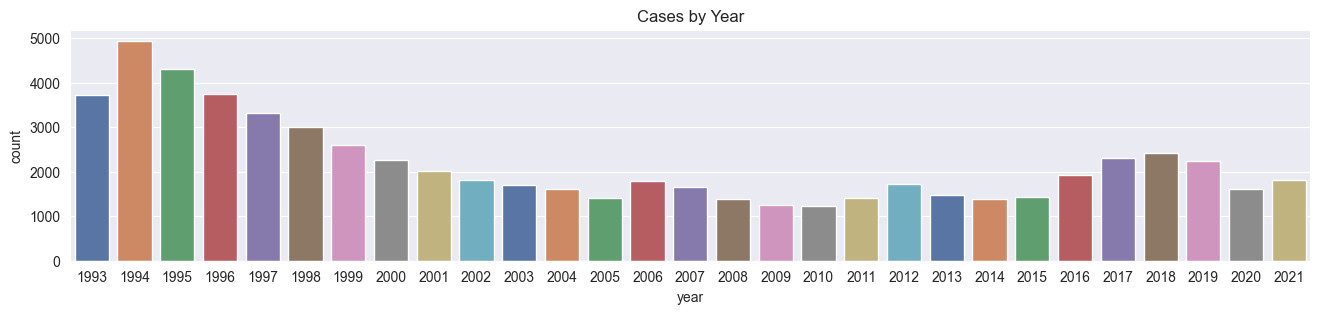

In [289]:
plt.figure(figsize=(16,3))
plt.title('Cases by Year')
sns.countplot(data=df,x='year',palette='deep')
plt.show()

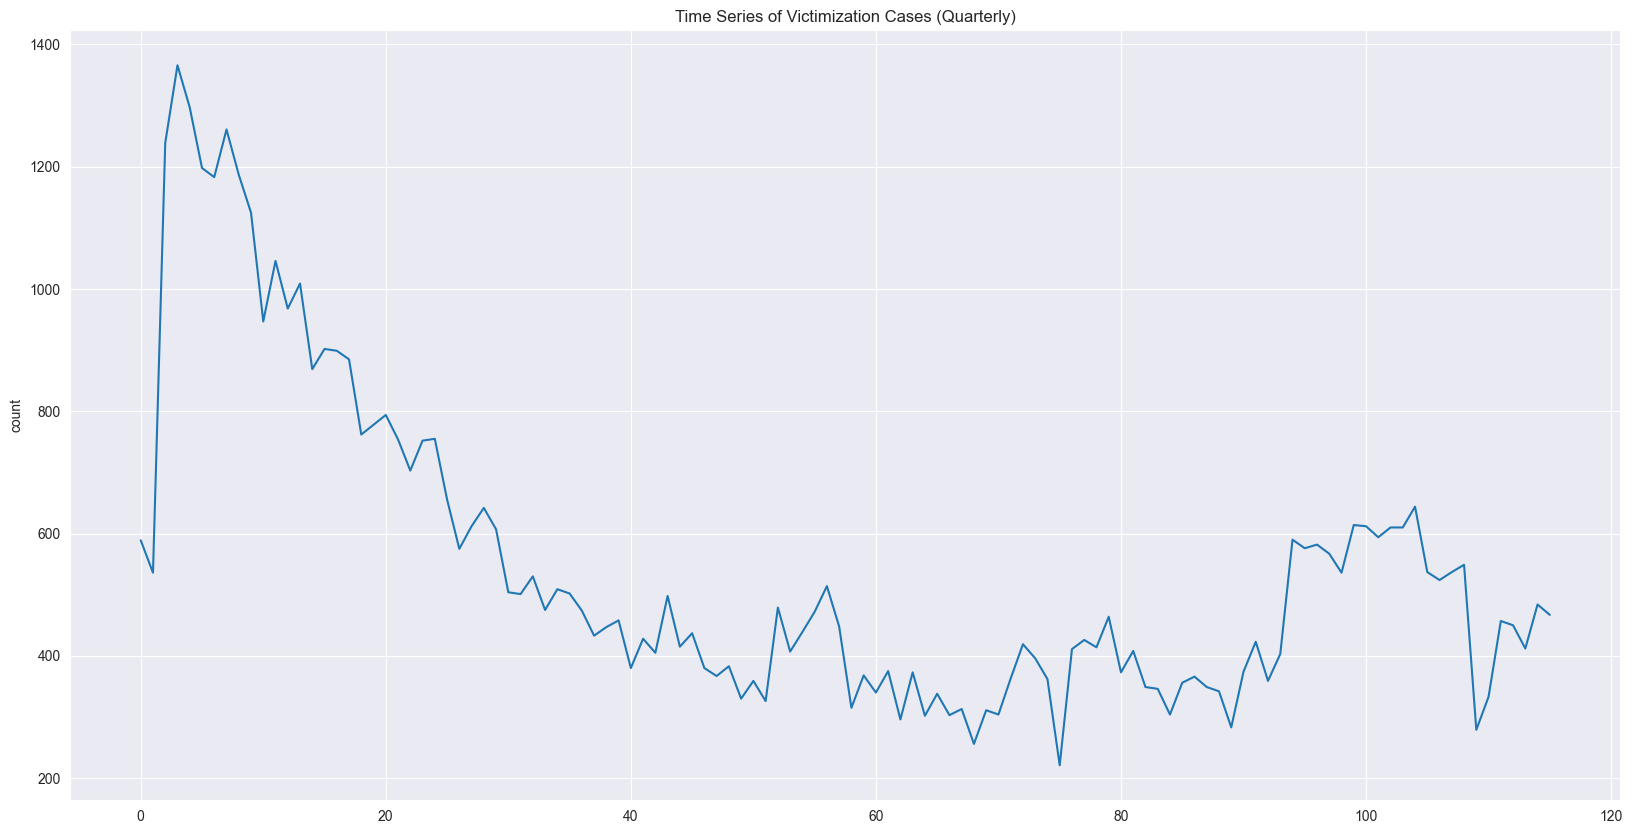

In [290]:
plt.figure(figsize=(20,10))
plt.title('Time Series of Victimization Cases (Quarterly)')
sns.lineplot(data=time_df,x=time_df.index,y='count')
plt.show()

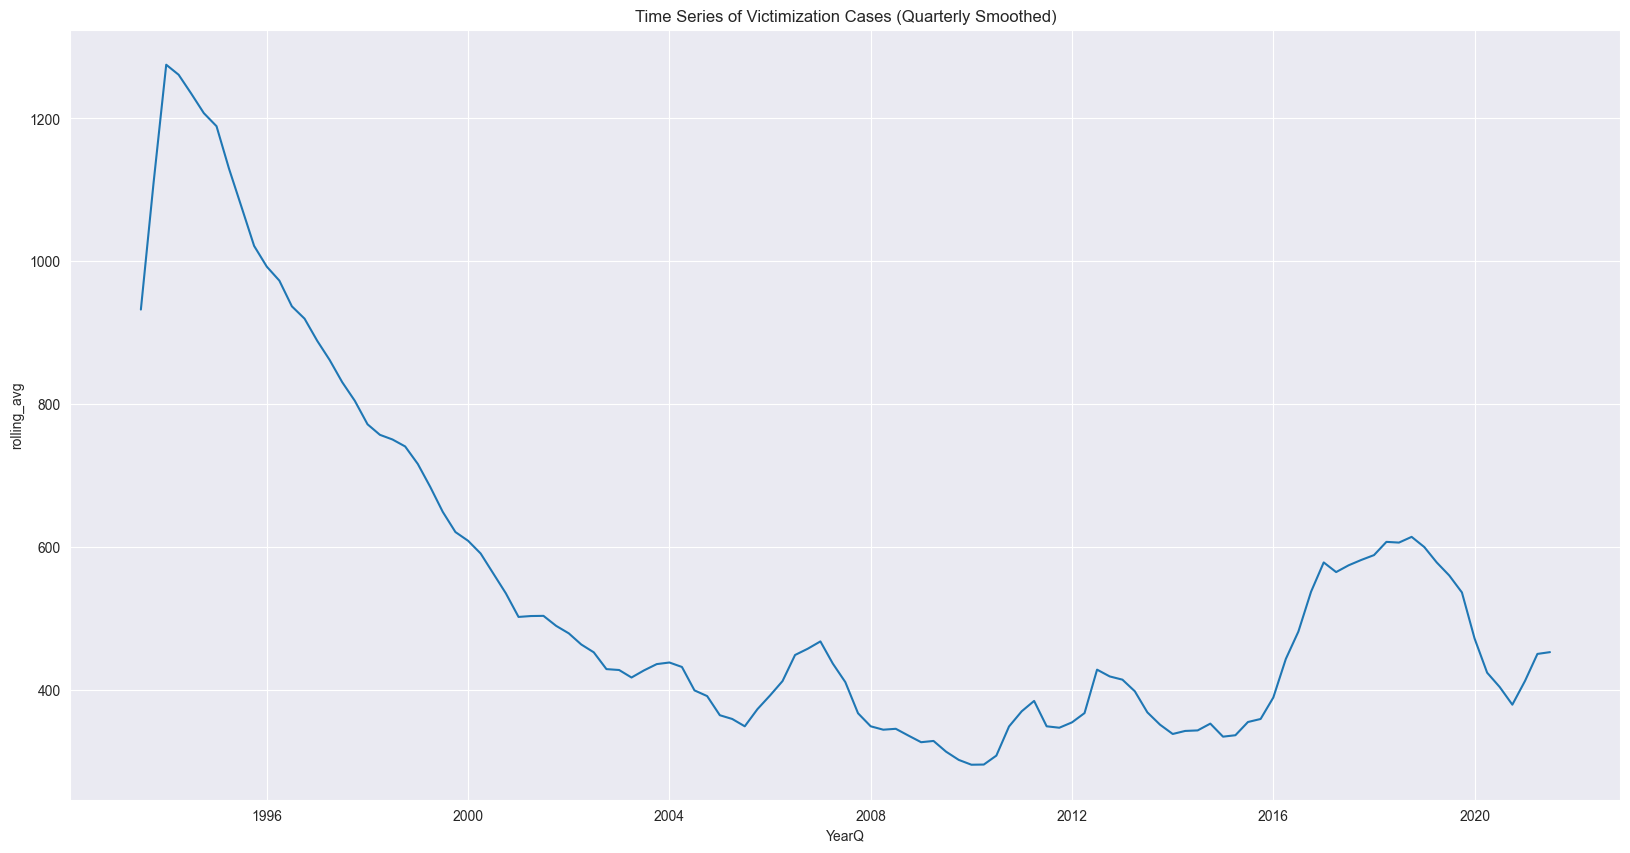

In [291]:
time_df['rolling_avg'] = time_df['count'].rolling(window=4, center=True).mean()

plt.figure(figsize=(20, 10))
plt.title('Time Series of Victimization Cases (Quarterly Smoothed)')
sns.lineplot(data=time_df, x='YearQ', y='rolling_avg')
plt.show()

Smoothing of Time-Series graph to reduce noise and improve visibility of trends and seasonality

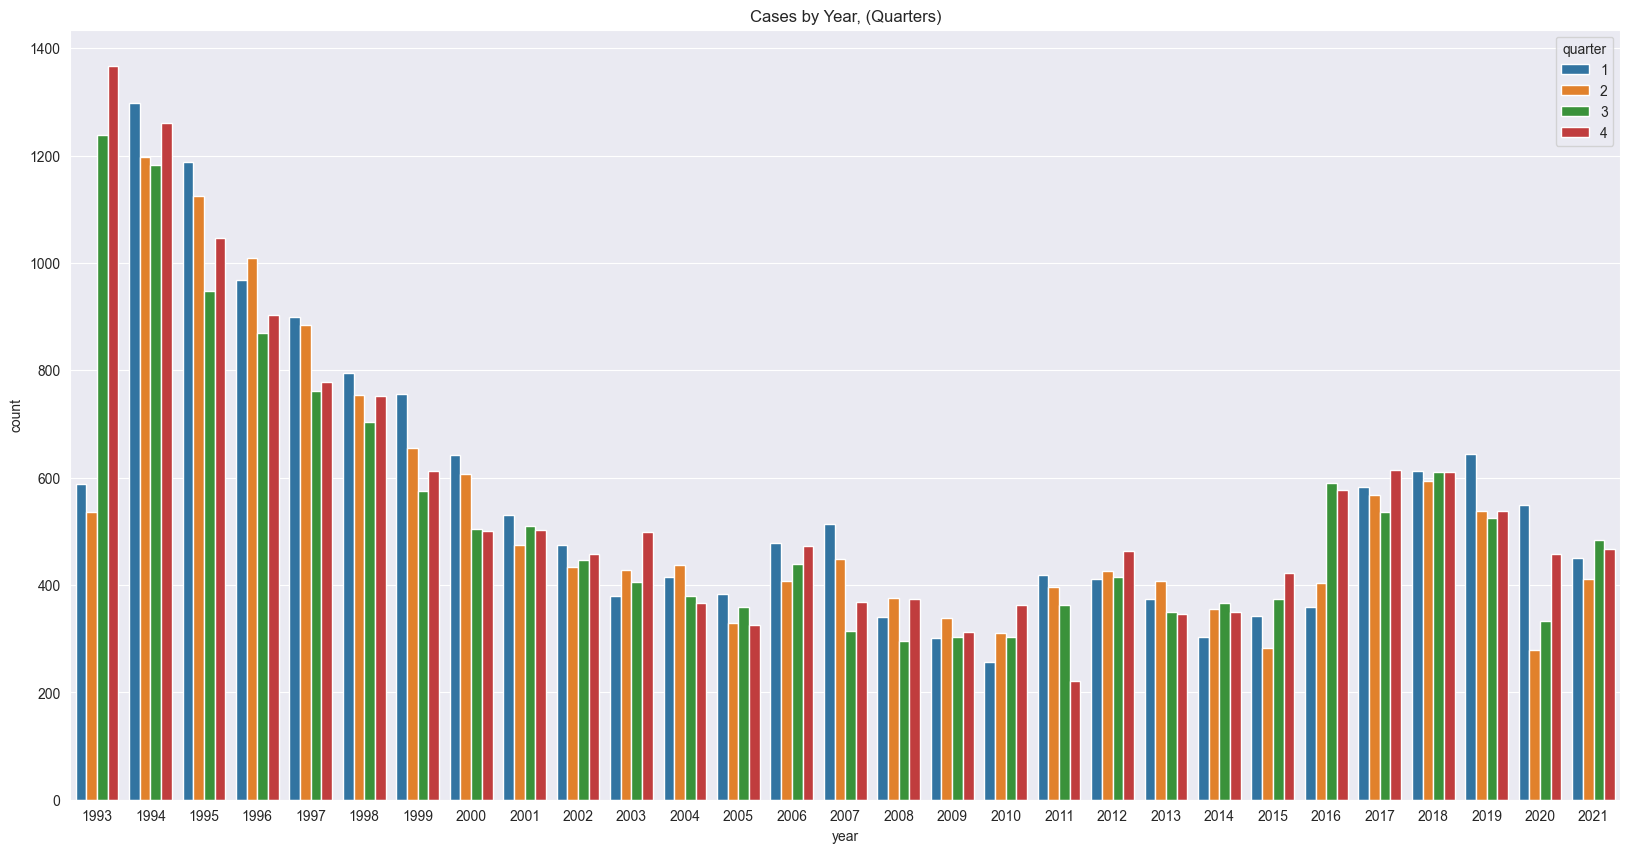

In [292]:
plt.figure(figsize=(20,10))
plt.title('Cases by Year, (Quarters)')
sns.countplot(x=df['year'],hue=df['quarter'])
plt.show()

<Axes: title={'center': 'Cases by Quarter'}, xlabel='quarter', ylabel='count'>

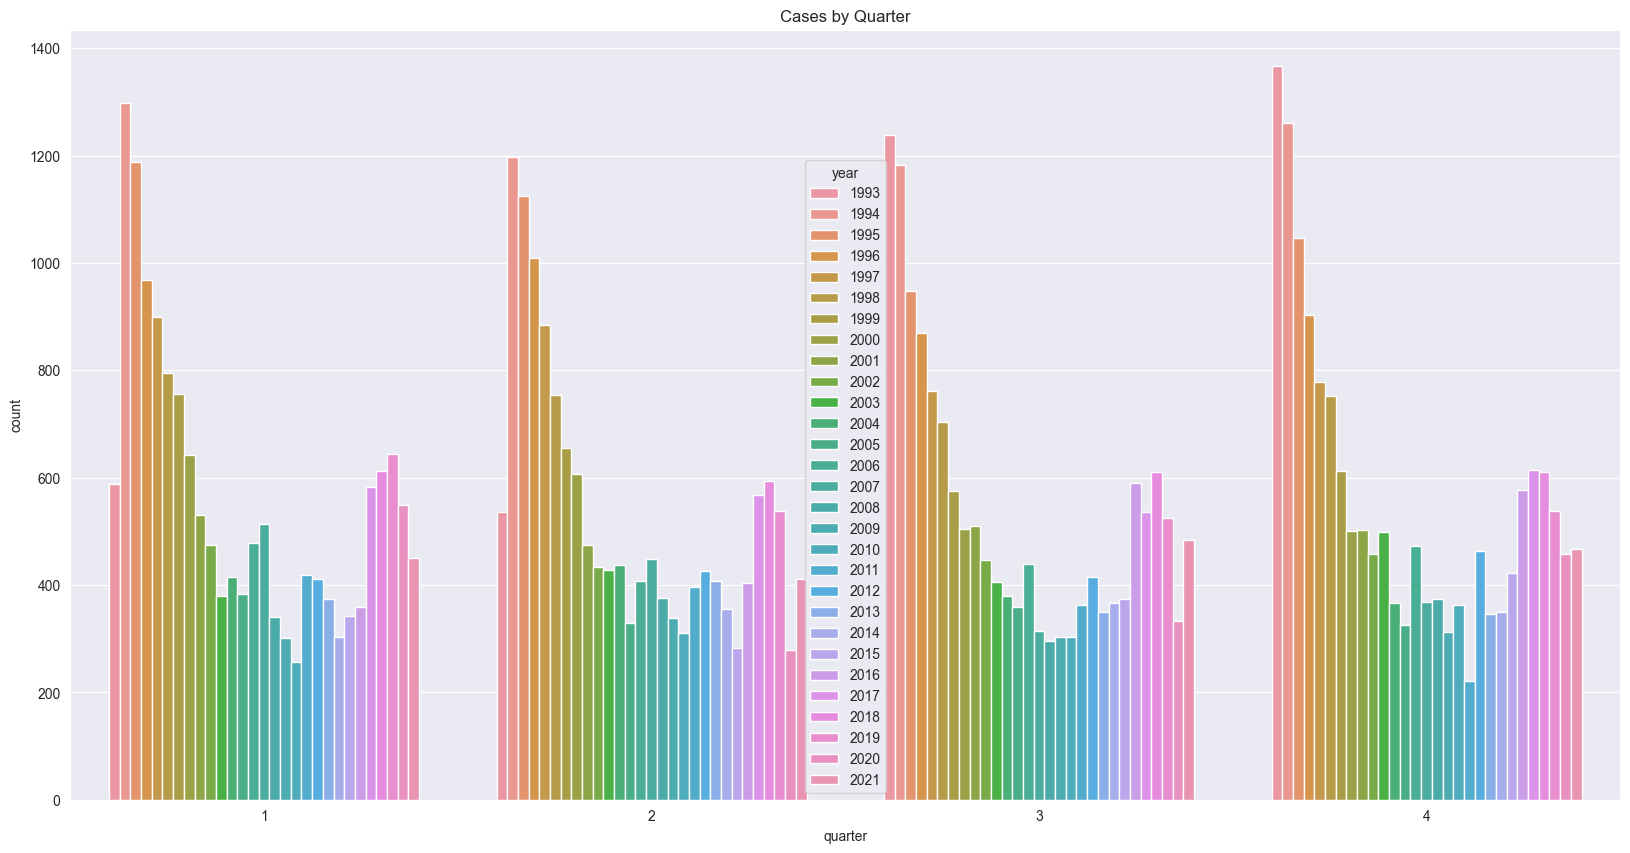

In [293]:

plt.figure(figsize=(20,10))
plt.title('Cases by Quarter')
sns.countplot(x=df['quarter'].sort_values(),hue=df['year'])

<Axes: title={'center': 'Total Cases Count by Quarter'}, xlabel='quarter', ylabel='count'>

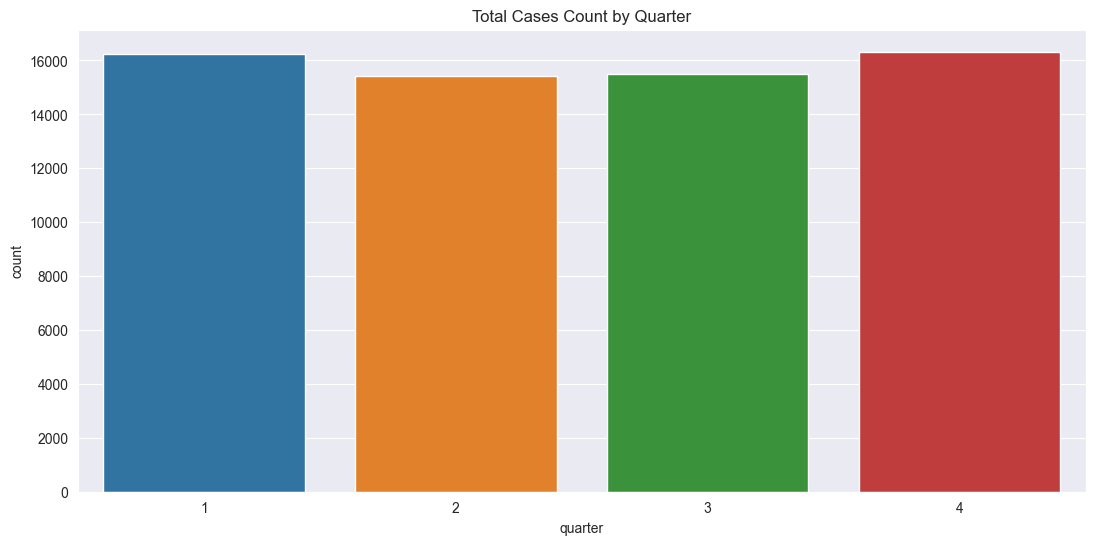

In [294]:
plt.figure(figsize=(13,6))
plt.title('Total Cases Count by Quarter')
sns.countplot(x=df['quarter'].sort_values())

## Seasonal Decompose

In [295]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition
result=seasonal_decompose(time_df['count'], model='additive', period=12)
trend = result.trend
seasonal = result.seasonal
residual = result.resid

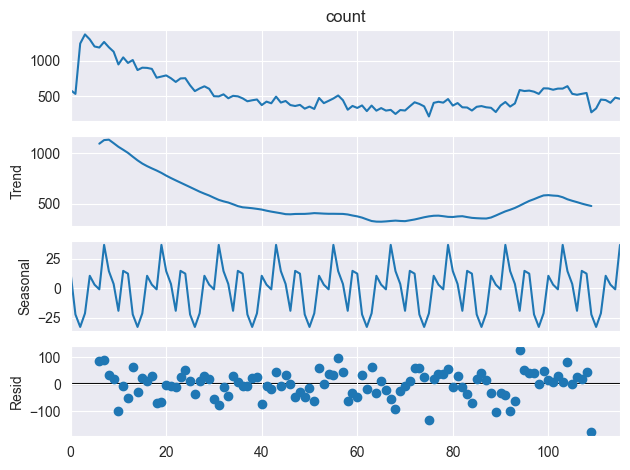

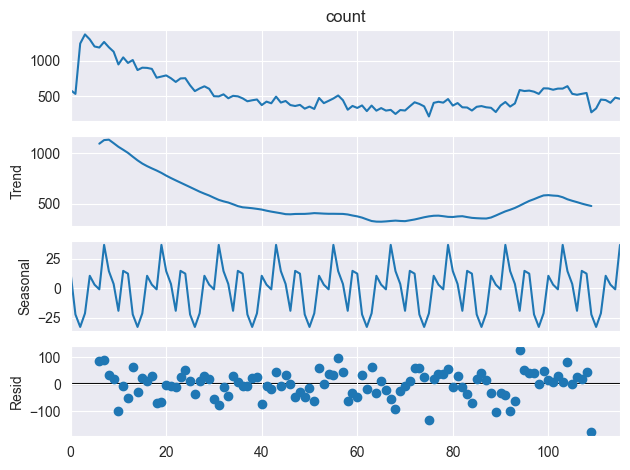

In [296]:
result.plot()

Properties and types of series (towardsdatascience.com)

Trend : A long-term increase or decrease in the data. This can be seen as a slope (is doesn’t have to be linear) roughly going through the data.

Seasonality : A time series is said to be seasonal when it is affected by seasonal factors (hour of day, week, month, year, etc.). Seasonality can be observed with nice cyclical patterns of fixed frequency.

Residuals : Each time series can be decomposed in two parts:
- A forecast, made up of one or several forecasted values
- Residuals. They are the difference between an observation and its predicted value at each time step. Remember that

## Auto Correlation Graphs (ACF & PACF)

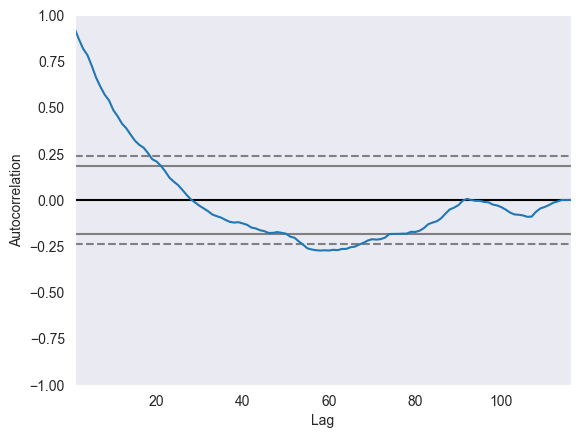

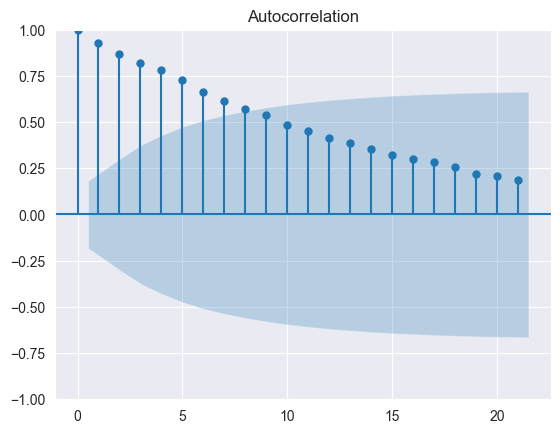

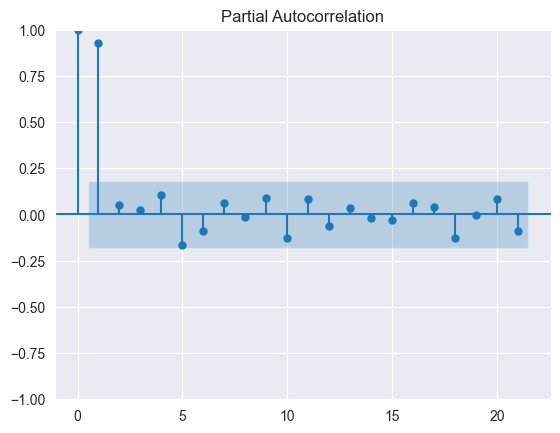

In [297]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(time_df['count'])
plot_acf(time_df['count'])
plot_pacf(time_df['count'])
plt.show()

## Check for Stationary Data

In [298]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_df['count'])
p_value = result[1]
p_value

0.0041841657426654934

In [299]:
from statsmodels.tsa.stattools import kpss

result = kpss(time_df['count'].values, regression = "ct")
p_value = result[1]
p_value

0.01

Since both P values from the Augemented Dickey Fuller test and KPSS test are < 0.5, Data of the Time Series are stationary

## Data Splitting


In [300]:
split_index = int(0.8 * len(time_df))
time_df = time_df.drop(columns='rolling_avg')
train_data = time_df.iloc[:split_index]
test_data = time_df.iloc[split_index:]

print("Training data shape:", train_data.shape)

print("Testing data shape:", test_data.shape, test_data)

Training data shape: (92, 2)
Testing data shape: (24, 2)          YearQ  count
92  2016-01-01    359
93  2016-04-01    403
94  2016-07-01    590
95  2016-10-01    576
96  2017-01-01    582
97  2017-04-01    567
98  2017-07-01    536
99  2017-10-01    614
100 2018-01-01    612
101 2018-04-01    594
102 2018-07-01    610
103 2018-10-01    610
104 2019-01-01    644
105 2019-04-01    537
106 2019-07-01    524
107 2019-10-01    537
108 2020-01-01    549
109 2020-04-01    279
110 2020-07-01    333
111 2020-10-01    457
112 2021-01-01    450
113 2021-04-01    412
114 2021-07-01    484
115 2021-10-01    467


## ARIMA

In [301]:
from statsmodels.tsa.arima.model import ARIMA


In [302]:
train_data = train_data.set_index('YearQ')

In [303]:
 # Define the order of the ARIMA model (p: autoregressive order, d: differencing order, q: moving average order)
ARIMAModel = ARIMA(train_data, order=(20,0,8))
fitted_ARIMAModel = model.fit()

(p,d,q) Values are chosen off PACF and ACF graphs


In [304]:
forecastArima = fitted_ARIMAModel.forecast(steps=len(test_data))

In [305]:
vis_df = time_df.set_index('YearQ')
vis_df = pd.concat([vis_df,forecastArima])

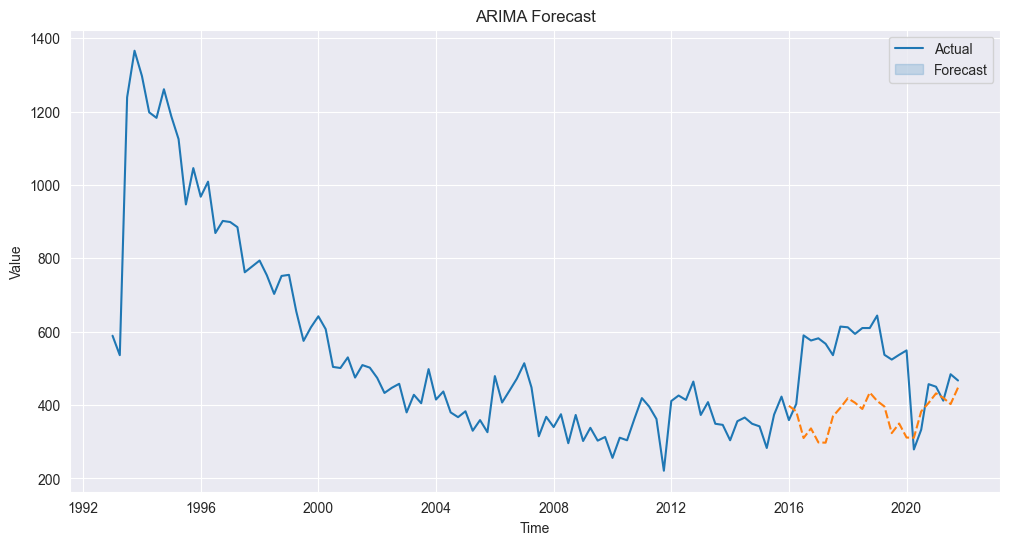

In [306]:

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=vis_df)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend(['Actual', 'Forecast'])
plt.show()

##  Seasonal Holt-Winters 

In [307]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing


SHWmodel = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12)
fitted_SHWModel = model.fit()

In [308]:
forecastSHW = fitted_SHWModel.forecast(24)

In [309]:
vis_df = time_df.set_index('YearQ')
vis_df = pd.concat([vis_df,forecastSHW])

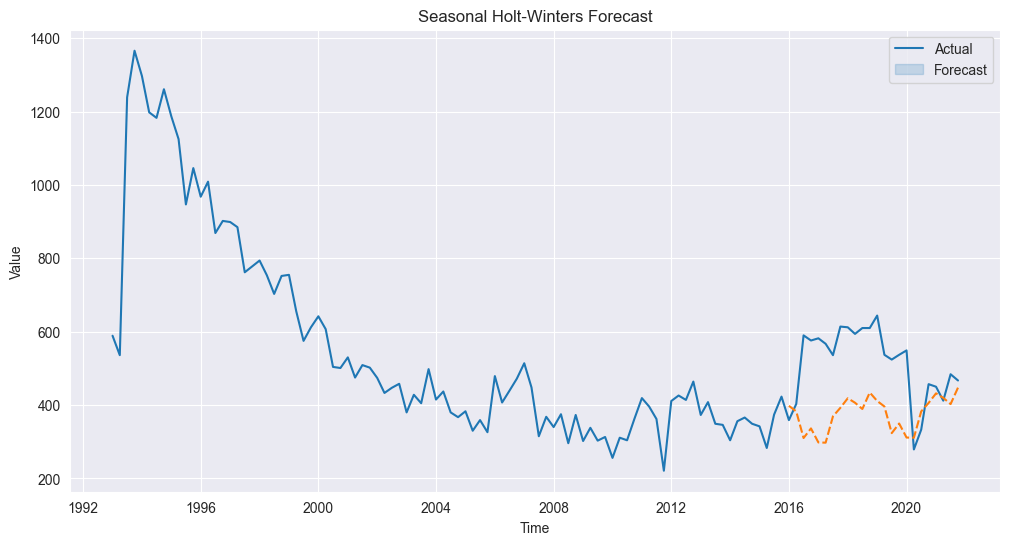

In [310]:

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=vis_df)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Seasonal Holt-Winters Forecast')
plt.legend(['Actual', 'Forecast'])
plt.show()

### Prophet


In [311]:
from prophet import Prophet

In [321]:
# Modifying df to fit prophet model

#Training Data
trainprop_df = pd.DataFrame(columns=['ds','y'])
trainprop_df['ds'] = train_data.index
trainprop_df['y'] = train_data['count'].tolist()



#Testing Data
testprop_df = pd.DataFrame(columns=['ds','y'])
testprop_df['ds'] = test_data['YearQ']
testprop_df['y'] = test_data['count'].tolist()

print([trainprop_df.head(),testprop_df.head()])

[          ds     y
0 1993-01-01   589
1 1993-04-01   536
2 1993-07-01  1239
3 1993-10-01  1366
4 1994-01-01  1297, '',            ds    y
92 2016-01-01  359
93 2016-04-01  403
94 2016-07-01  590
95 2016-10-01  576
96 2017-01-01  582]


In [313]:
m = Prophet()
m.fit(trainprop_df)

16:02:45 - cmdstanpy - INFO - Chain [1] start processing
16:02:45 - cmdstanpy - INFO - Chain [1] done processing


In [314]:
forecastProphet = m.predict(testprop_df)
#forecastProphet = forecast.set_index(['ds'])

In [327]:
forecastProphet = forecastProphet[['ds','yhat']]
forecastProphet = forecastProphet.set_index('ds')
forecastProphet

,yhat
ds,
2016-01-01,344.283705
2016-04-01,272.154988
2016-07-01,262.646503
2016-10-01,302.338917
2017-01-01,216.366640
2017-04-01,253.847112
2017-07-01,271.030827
2017-10-01,296.948198
2018-01-01,266.595091


In [328]:
vis_df = time_df.set_index('YearQ')
vis_df = pd.concat([vis_df,forecastProphet['yhat']])

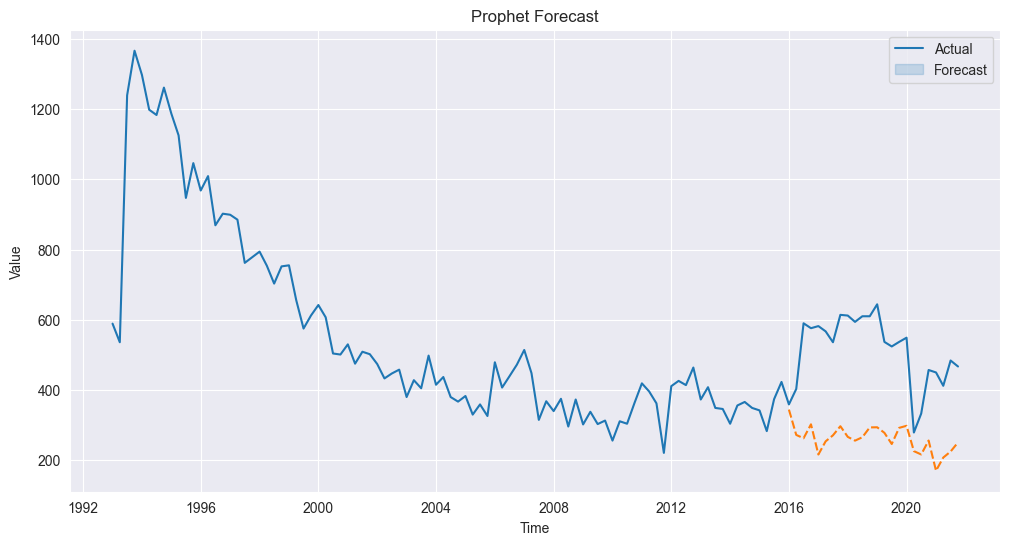

In [329]:

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=vis_df)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Prophet Forecast')
plt.legend(['Actual', 'Forecast'])
plt.show()

## Model Evaluation

Metrics Used:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE) 
- Mean Absolute Percentage Error (MAPE)